<a href="https://colab.research.google.com/github/youcef-4/VisDrone/blob/main/tph_yolov5_on_VisDrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/youcef-4/VisDrone.git

Cloning into 'VisDrone'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 271 (delta 128), reused 242 (delta 112), pack-reused 0
Receiving objects: 100% (271/271), 9.29 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [2]:
!cd tph-yolov5

/bin/bash: line 0: cd: tph-yolov5: No such file or directory


In [3]:
!pip install -r /content/VisDrone/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=828cf183c2f96d882bcbea085dd0376bd4d18e8df86ab8f76fd0a46f4827d143
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!python /content/VisDrone/VisDrone2YOLO_lable.py

548


In [6]:
#!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

In [7]:
#!sudo update-alternatives --config python3

In [8]:
#! python --version

In [9]:
#!pip3 install clean-fid numba numpy torch==2.0.0+cu118 torchvision --force-reinstall --extra-index-url https://download.pytorch.org/whl/cu118

In [10]:
#print(torch.__version__)

In [11]:
#!pip install opencv-python>=4.1.2

In [16]:
#!/bin/bash

# Define the file path
FILE_PATH="/usr/local/lib/python3.10/dist-packages/torch/nn/modules/upsampling.py"

# Make a backup of the original file
!cp $FILE_PATH "${FILE_PATH}.bak"

# Use sed to comment out the line
!sed -i 's/\(recompute_scale_factor=self.recompute_scale_factor\)/#\1\n/g' $FILE_PATH


cp: cannot create regular file '$/usr/local/lib/python3.10/dist-packages/torch/nn/modules/upsampling.py.bak': No such file or directory


In [19]:
!python /content/VisDrone/val.py --weights /content/drive/MyDrive/VisDrone/yolov5l-xs-2.pt --img 1996 --data /content/VisDrone/data/VisDrone.yaml --augment --save-txt  --save-conf --task val --batch-size 8 --verbose --name v5l-xs

val: data=/content/VisDrone/data/VisDrone.yaml, weights=['/content/drive/MyDrive/VisDrone/yolov5l-xs-2.pt'], batch_size=8, imgsz=1996, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=True, verbose=True, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=VisDrone/runs/val, name=v5l-xs, exist_ok=False, half=False
YOLOv5 🚀 90950ff torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model Summary: 589 layers, 68030516 parameters, 0 gradients, 151.8 GFLOPs

100% 1.44G/1.44G [00:48<00:00, 31.7MB/s]
Unzipping ../datasets/VisDrone/VisDrone2019-DET-train.zip...
100% 77.9M/77.9M [00:54<00:00, 1.49MB/s]
Unzipping ../datasets/VisDrone/VisDrone2019-DET-val.zip...
100% 297M/297M [00:17<00:00, 17.7MB/s]
Unzipping ../datasets/VisDrone/VisDrone2019-DET-test-dev.zip...
100% 292M/292M [00:13<00:00, 23.0MB/s]
Unzipping ../datasets/VisDrone/VisDrone2019-DET-test-challenge.zip...
Converting ../datasets/VisDrone/VisDrone2019-DET-train: 6471it

In [14]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.metrics import confusion_matrix
from pathlib import Path
import numpy as np

preds_path = '/content/VisDrone/runs/val/v5l-xs/labels'
labels_path = '/datasets/VisDrone/VisDrone2019-DET-val/labels'
class_names = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']

# Function to compute the intersection-over-union (IoU) between two bounding boxes
def bbox_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# Function to match predicted and ground truth labels using a greedy matching algorithm
def match_labels(preds, labels):
    matches = []
    for pred in preds:
        best_iou = 0
        best_label = None
        for label in labels:
            iou = bbox_iou(pred[1:], label[1:])
            if iou > best_iou:
                best_iou = iou
                best_label = label
        if best_label is not None:
            matches.append((pred, best_label))
            labels.remove(best_label)
    return matches

# Find the common label files
preds_files = set(f.name for f in Path(preds_path).glob('*.txt'))
labels_files = set(f.name for f in Path(labels_path).glob('*.txt'))
common_files = sorted(preds_files & labels_files)

# Match the predicted and ground truth labels
matches = []
for file in common_files:
    preds = np.loadtxt(Path(preds_path) / file)
    if preds.ndim == 1:
        preds = preds.reshape(1, -1)
    labels = np.loadtxt(Path(labels_path) / file)
    if labels.ndim == 1:
        labels = labels.reshape(1, -1)
    matches.extend(match_labels(preds.tolist(), labels.tolist()))

# Extract the class labels from the matched pairs
preds_classes = [int(p[0]) for p, l in matches]
labels_classes = [int(l[0]) for p, l in matches]

# Generate the confusion matrix
cm = confusion_matrix(labels_classes, preds_classes)

# Print the confusion matrix
print(cm)


[[ 6797   569   132   587   179    62    79    44    15   361]
 [  904  2932   115   345   111    39    97    41     8   532]
 [  184   114   529   131    53     9    22    12     1   228]
 [  249   121    31 13008   361    83    42    25    23   115]
 [   42    23    10   713  1080    48    12    14    10    23]
 [   25    13     3   144    59   438    21    19    14    14]
 [   72    82    25   166    63    34   416    69     1   117]
 [   33    42    12    90    43    23    93   125     0    71]
 [    8     8     2    22    14    15     2     0   179     0]
 [  395   428   179   348   124    33    88    33     8  3247]]


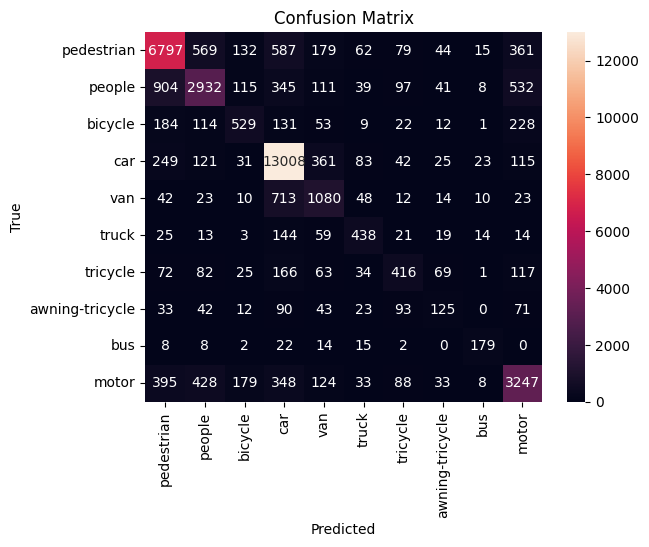

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# The confusion matrix
cm = [[ 6797, 569, 132, 587, 179, 62, 79, 44, 15, 361],
      [ 904, 2932, 115, 345, 111, 39, 97, 41, 8, 532],
      [ 184, 114, 529, 131, 53, 9, 22, 12, 1, 228],
      [ 249, 121, 31, 13008, 361, 83, 42, 25, 23, 115],
      [ 42 ,23 ,10 ,713 ,1080 ,48 ,12 ,14 ,10 ,23],
      [25 ,13 ,3 ,144 ,59 ,438 ,21 ,19 ,14 ,14],
      [72 ,82 ,25 ,166 ,63 ,34 ,416 ,69 ,1 ,117],
      [33 ,42 ,12 ,90 ,43 ,23 ,93 ,125 ,0 ,71],
      [8 ,8 ,2 ,22 ,14 ,15 ,2 ,0 ,179 ,0],
      [395 ,428 ,179 ,348 ,124 ,33 ,88 ,33 ,8 ,3247]]

# The class names
class_names = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']

# Create the heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
